## Import all necessary modules

### numpy: 
    NumPy is the core library for scientific and numerical computing in Python. It provides high-performance 
    multidimensional array object and tools for working with arrays. In NumPy, ‘Arrays’ dimensions are called Axes.

### cv2:
    a module in OpenCV library which is used in many computer-vision applications

### matplotlib.pyplot
    - Matplotlib is designed to be as similar to MATLAB, with the ability to use Python. 
    'pyplot' function makes some change to a figure we input 
    (creating a figure, creating a plotting area in a figure,
    plots some lines in a plotting area, etc.)
    
    - rcParams is used to size the output image by pyplot function
    
### pause
    - suspends execution of your program for a given time
 
### import_ipynb
    - to load other jupyter notebooks to this notebook
    
### subprocess
    - here we use this module instead of os module to send commands sometimes, trying something new!

In [203]:
# -*- coding: utf-8 -*-

"""
Created On 8 Jan 2021 18:38 PM

@author: from EA & HAM Club

"""

import numpy as np
import os
from matplotlib import pyplot as plt
import pause
import cv2
import time
import subprocess
import import_ipynb

%matplotlib inline

### Capture screenshot of your current screen


---


    - Take the screenshot and store it as 'screencap.png' on your pc
    - Now pull the screencap.png from your mobile to your PC

In [204]:
os.system('adb shell screencap -p /sdcard/screencap.png')
os.system('adb pull /sdcard/screencap.png')

0

## Read the image


---


    - Read the image stored in your platform-tools folder, after it's captured

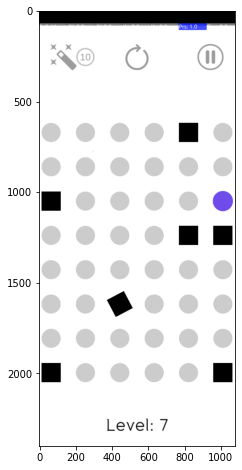

In [205]:
image_path  = 'screencap.png'
img = cv2.imread(image_path)

# make sure the displayed image is large enough, just for good presentation looks :P
plt.rcParams["figure.figsize"] = [15,8]
plt.imshow(img)

## Read the screen dimensions and crop the image to obtain region of interest


---


    - Store the screen height, width
    - Crop the image
    - Convet the BGR image to Gray scale image

(2400, 1080, 3)


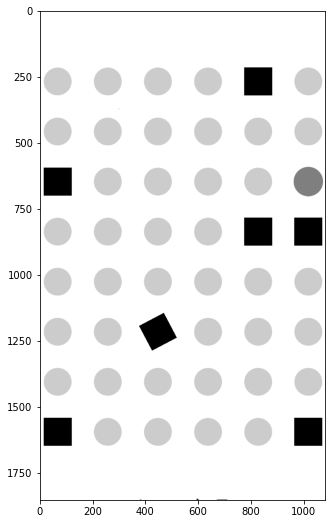

In [206]:
y, x, z = img.shape
print(img.shape)
startY = int(y//6)
endY = int(y//1.065)

# Crop your image to required region of interest (ROI)
img = img[startY:endY, :, :]

# Make some cropped image copies which we will use later in the code
img_orig = img.copy()
img_orig_2 = img.copy()

# convert the BGR image to Gray scale image
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.rcParams["figure.figsize"] = [16,9]
plt.imshow(img, cmap='gray')

## Blur the image to reduce the noise while circle detection


---


    - use GaussianBlur module from open-cv to blur the image, this reduces the noise while detecting cirlces later on

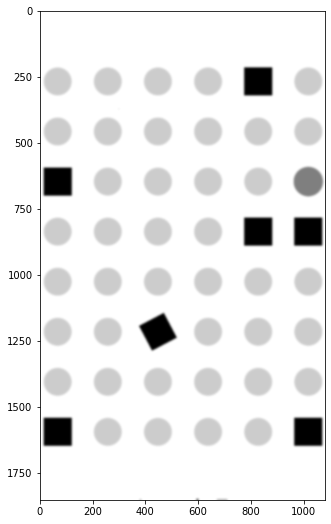

In [207]:
img = cv2.GaussianBlur(img, (21,21), cv2.BORDER_DEFAULT)

plt.rcParams["figure.figsize"] = [16,9]
plt.imshow(img, cmap='gray')

## Set the range in which your circle radius lies


---


    - tweak minimum and maximum radius parameters, so that your circles are detected by the circle detector

In [208]:
#var_radius = 20 * (x//540)

all_circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 30, param1 = 30, param2=15, minRadius=45, maxRadius=55)

print(all_circles)

[[[ 255.5  837.5   52.6]
  [ 444.5  458.5   52.4]
  [ 444.5 1594.5   52.2]
  [ 823.5 1026.5   52.4]
  [ 634.5 1405.5   52.5]
  [ 255.5  269.5   52.2]
  [1012.5 1026.5   52.3]
  [ 444.5  269.5   52.7]
  [  65.5 1405.5   52.5]
  [ 634.5  837.5   52.5]
  [ 634.5 1026.5   52.6]
  [ 255.5  458.5   52.5]
  [ 255.5  648.5   52.7]
  [ 634.5  269.5   52.6]
  [ 634.5 1216.5   52.5]
  [ 444.5  647.5   52.4]
  [  66.5  269.5   52.9]
  [ 823.5  458.5   52.4]
  [ 823.5 1594.5   52.9]
  [1012.5 1216.5   52.9]
  [ 823.5 1405.5   52.9]
  [ 823.5  648.5   51.8]
  [ 255.5 1405.5   52.9]
  [ 255.5 1027.5   52. ]
  [ 633.5  459.5   52.9]
  [1012.5 1404.5   52.8]
  [  66.5  837.5   51.8]
  [ 445.5 1405.5   52.2]
  [ 255.5 1216.5   52. ]
  [ 255.5 1595.5   52. ]
  [1012.5  458.5   51.8]
  [  65.5 1216.5   51.8]
  [  66.5  458.5   52.9]
  [1013.5  269.5   52.2]
  [ 633.5 1595.5   53. ]
  [ 444.5 1027.5   51.9]
  [ 823.5 1216.5   51.8]
  [ 634.5  647.5   52.8]
  [ 444.5  838.5   52.1]
  [  66.5 1027.5   51.8]


In [209]:
# Round off the center coordinates of each circle to nearest integer values

all_circles_rounded = np.uint16(np.around(all_circles))

print(all_circles_rounded)

[[[ 256  838   53]
  [ 444  458   52]
  [ 444 1594   52]
  [ 824 1026   52]
  [ 634 1406   52]
  [ 256  270   52]
  [1012 1026   52]
  [ 444  270   53]
  [  66 1406   52]
  [ 634  838   52]
  [ 634 1026   53]
  [ 256  458   52]
  [ 256  648   53]
  [ 634  270   53]
  [ 634 1216   52]
  [ 444  648   52]
  [  66  270   53]
  [ 824  458   52]
  [ 824 1594   53]
  [1012 1216   53]
  [ 824 1406   53]
  [ 824  648   52]
  [ 256 1406   53]
  [ 256 1028   52]
  [ 634  460   53]
  [1012 1404   53]
  [  66  838   52]
  [ 446 1406   52]
  [ 256 1216   52]
  [ 256 1596   52]
  [1012  458   52]
  [  66 1216   52]
  [  66  458   53]
  [1014  270   52]
  [ 634 1596   53]
  [ 444 1028   52]
  [ 824 1216   52]
  [ 634  648   53]
  [ 444  838   52]
  [  66 1028   52]
  [1012  648   54]]]


## Visualize in which order the circles are detected by the 


---


    - iterate through all_circles_rounded and for each center coordinate put text [using "putText" module] on the copy of 
    img (img_orig) as shown

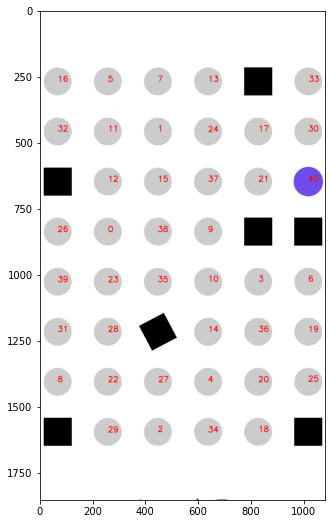

In [210]:
# For each circle in the detected circles, give the number in the order of detection

count = 1
for i in all_circles_rounded[0, :]:
    fontColor=(255,0,0)    # red color font
    textPlace = (i[0],i[1])
    fontScale = 1
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_orig,str(count-1),textPlace,font, fontScale, fontColor,2)
    count+=1

plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(img_orig)


## Store only center coordinates to makes calculations easier


---

    - now we donot need radius of our circle much, because our primary goal is to make a 'visitable' path

In [211]:
listedAllCrcles=[]

"""
    Let's add all the (x,y) coordinate of center to an empty list
"""

for i in (all_circles_rounded[0]):
    listedAllCrcles.append(np.ndarray.tolist(i[0:])[0:2])

print(listedAllCrcles)

[[256, 838], [444, 458], [444, 1594], [824, 1026], [634, 1406], [256, 270], [1012, 1026], [444, 270], [66, 1406], [634, 838], [634, 1026], [256, 458], [256, 648], [634, 270], [634, 1216], [444, 648], [66, 270], [824, 458], [824, 1594], [1012, 1216], [824, 1406], [824, 648], [256, 1406], [256, 1028], [634, 460], [1012, 1404], [66, 838], [446, 1406], [256, 1216], [256, 1596], [1012, 458], [66, 1216], [66, 458], [1014, 270], [634, 1596], [444, 1028], [824, 1216], [634, 648], [444, 838], [66, 1028], [1012, 648]]


In [212]:
"""
    Let's sort the list of circles w.r.t. x-coordinate
"""

listedAllCrcles.sort()
print(listedAllCrcles)

[[66, 270], [66, 458], [66, 838], [66, 1028], [66, 1216], [66, 1406], [256, 270], [256, 458], [256, 648], [256, 838], [256, 1028], [256, 1216], [256, 1406], [256, 1596], [444, 270], [444, 458], [444, 648], [444, 838], [444, 1028], [444, 1594], [446, 1406], [634, 270], [634, 460], [634, 648], [634, 838], [634, 1026], [634, 1216], [634, 1406], [634, 1596], [824, 458], [824, 648], [824, 1026], [824, 1216], [824, 1406], [824, 1594], [1012, 458], [1012, 648], [1012, 1026], [1012, 1216], [1012, 1404], [1014, 270]]


## Set each x-value of centers in a row to 'unique' value to the row


---

    - sometimes the coordinates along one row may have different x-values though they're in the same row, to make a uniform matrix, we can set all the values of a row to UNIQUE value

In [213]:
"""
    Let's roundup all the same row x-coordinates to ONE SINGLE VALUE for each line 
"""


for j,i in enumerate(listedAllCrcles[1:]):
    if abs(listedAllCrcles[j+1][0]-listedAllCrcles[j][0]) < 5:
        listedAllCrcles[j+1][0]=listedAllCrcles[j][0]


print(listedAllCrcles)

[[66, 270], [66, 458], [66, 838], [66, 1028], [66, 1216], [66, 1406], [256, 270], [256, 458], [256, 648], [256, 838], [256, 1028], [256, 1216], [256, 1406], [256, 1596], [444, 270], [444, 458], [444, 648], [444, 838], [444, 1028], [444, 1594], [444, 1406], [634, 270], [634, 460], [634, 648], [634, 838], [634, 1026], [634, 1216], [634, 1406], [634, 1596], [824, 458], [824, 648], [824, 1026], [824, 1216], [824, 1406], [824, 1594], [1012, 458], [1012, 648], [1012, 1026], [1012, 1216], [1012, 1404], [1012, 270]]


In [214]:
"""
    Let's sort the list of circles w.r.t. y-coordinate
"""

listedAllCrcles.sort(key = lambda x: x[1])

print(listedAllCrcles)

[[66, 270], [256, 270], [444, 270], [634, 270], [1012, 270], [66, 458], [256, 458], [444, 458], [824, 458], [1012, 458], [634, 460], [256, 648], [444, 648], [634, 648], [824, 648], [1012, 648], [66, 838], [256, 838], [444, 838], [634, 838], [634, 1026], [824, 1026], [1012, 1026], [66, 1028], [256, 1028], [444, 1028], [66, 1216], [256, 1216], [634, 1216], [824, 1216], [1012, 1216], [1012, 1404], [66, 1406], [256, 1406], [444, 1406], [634, 1406], [824, 1406], [444, 1594], [824, 1594], [256, 1596], [634, 1596]]


## Set each y-value of centers in a column to 'unique' value to the column


---

    - sometimes the coordinates along one column may have different y-values though they're in the same column, to make a
    uniform matrix - we can set all the values of a column to UNIQUE value

In [215]:
"""
    Let's roundup all the same column y-coordinates to ONE SINGLE VALUE for each line 
"""

for j,i in enumerate(listedAllCrcles[1:]):
    if abs(listedAllCrcles[j+1][1]-listedAllCrcles[j][1])<5:
        listedAllCrcles[j+1][1]=listedAllCrcles[j][1]

print(listedAllCrcles)

[[66, 270], [256, 270], [444, 270], [634, 270], [1012, 270], [66, 458], [256, 458], [444, 458], [824, 458], [1012, 458], [634, 458], [256, 648], [444, 648], [634, 648], [824, 648], [1012, 648], [66, 838], [256, 838], [444, 838], [634, 838], [634, 1026], [824, 1026], [1012, 1026], [66, 1026], [256, 1026], [444, 1026], [66, 1216], [256, 1216], [634, 1216], [824, 1216], [1012, 1216], [1012, 1404], [66, 1404], [256, 1404], [444, 1404], [634, 1404], [824, 1404], [444, 1594], [824, 1594], [256, 1594], [634, 1594]]


## Use dictionaries to make rows and columns


---


    - now our aim is to make rows and columns from given coordinates, the following for loops does this job for us
    - defaultdict is almost same as dictionary, but here we can use it to sort the obtained column keys, in order. Check it out by running the following 4 cells

In [216]:
from collections import defaultdict, OrderedDict

X = defaultdict(list)

for i in listedAllCrcles:
    if i[0] not in X.keys():
        X[i[0]].append(i[1])
    elif i[1] not in X[i[0]]:
        X[i[0]].append(i[1])

column = OrderedDict(sorted(X.items()))


for i in column.keys():
    column[i].sort()

In [217]:
column

OrderedDict([(66, [270, 458, 838, 1026, 1216, 1404]),
             (256, [270, 458, 648, 838, 1026, 1216, 1404, 1594]),
             (444, [270, 458, 648, 838, 1026, 1404, 1594]),
             (634, [270, 458, 648, 838, 1026, 1216, 1404, 1594]),
             (824, [458, 648, 1026, 1216, 1404, 1594]),
             (1012, [270, 458, 648, 1026, 1216, 1404])])

In [218]:
Y = defaultdict(list)

for i in listedAllCrcles:
    if i[1] not in Y.keys():
        Y[i[1]].append(i[0])
    elif i[0] not in Y[i[1]]:
        Y[i[1]].append(i[0])

row = OrderedDict(sorted(Y.items()))


for i in row.keys():
    row[i].sort()

In [219]:
row

OrderedDict([(270, [66, 256, 444, 634, 1012]),
             (458, [66, 256, 444, 634, 824, 1012]),
             (648, [256, 444, 634, 824, 1012]),
             (838, [66, 256, 444, 634]),
             (1026, [66, 256, 444, 634, 824, 1012]),
             (1216, [66, 256, 634, 824, 1012]),
             (1404, [66, 256, 444, 634, 824, 1012]),
             (1594, [256, 444, 634, 824])])

In [220]:
row_length = len(row.keys())
column_length = len(column.keys())
print(row_length, column_length)

8 6


In [221]:
arrRow = []
r = list([])
dkv = defaultdict(list)
z = 0

for j, key in enumerate(row.keys()):
    r = []
    for k, value in enumerate(row[key]):
        r.append(z)
        dkv[z] = ([key,value])
        z+=1
    arrRow.append(r)
    print(r)
    
print(dkv)

[0, 1, 2, 3, 4]
[5, 6, 7, 8, 9, 10]
[11, 12, 13, 14, 15]
[16, 17, 18, 19]
[20, 21, 22, 23, 24, 25]
[26, 27, 28, 29, 30]
[31, 32, 33, 34, 35, 36]
[37, 38, 39, 40]
defaultdict(<class 'list'>, {0: [270, 66], 1: [270, 256], 2: [270, 444], 3: [270, 634], 4: [270, 1012], 5: [458, 66], 6: [458, 256], 7: [458, 444], 8: [458, 634], 9: [458, 824], 10: [458, 1012], 11: [648, 256], 12: [648, 444], 13: [648, 634], 14: [648, 824], 15: [648, 1012], 16: [838, 66], 17: [838, 256], 18: [838, 444], 19: [838, 634], 20: [1026, 66], 21: [1026, 256], 22: [1026, 444], 23: [1026, 634], 24: [1026, 824], 25: [1026, 1012], 26: [1216, 66], 27: [1216, 256], 28: [1216, 634], 29: [1216, 824], 30: [1216, 1012], 31: [1404, 66], 32: [1404, 256], 33: [1404, 444], 34: [1404, 634], 35: [1404, 824], 36: [1404, 1012], 37: [1594, 256], 38: [1594, 444], 39: [1594, 634], 40: [1594, 824]})


## Function to get circle number from center coordinate


---


    - get the key (i.e., circle number from the coordinate using a function

In [222]:
def get_key(my_dict, val):
    for key, value in my_dict.items():
         if val == value:
            return key

In [223]:
arrCol = []
cl = list([])

for j,key in enumerate(column.keys()):
    cl = []
    for k, value in enumerate(column[key]):
        #print(list([value,key]))
        cl.append(get_key(dkv, [value,key]))
    arrCol.append(cl)
(arrCol)

[[0, 5, 16, 20, 26, 31],
 [1, 6, 11, 17, 21, 27, 32, 37],
 [2, 7, 12, 18, 22, 33, 38],
 [3, 8, 13, 19, 23, 28, 34, 39],
 [9, 14, 24, 29, 35, 40],
 [4, 10, 15, 25, 30, 36]]

## Function to check if two vertices are adjacent


---


    - there are black squares in some rows, so it is crucial for verifying adjacent circles
    - here we see if the coordinates of each circle have a difference less than 'certain value' this way we can know if 
    they're adjacent to each other based on proximity
    - each of these function returns "Boolean" value (i.e., True or False)

In [224]:
def checkAdjRow(a,b):
    return abs(a[1]-b[1]) < 200

def checkAdjCol(a,b):
    return abs(a[0]-b[0]) < 200

## Create edge between vertices along the row


---


    - here we make edges between each vertex
    - for this we use function we defined above to check each center along x-direction first
    - then we add them into a list called 'edges'

In [225]:
edges=[]


for i in arrRow:
    for j in range(len(i)-1):
        if checkAdjRow(dkv[i[j+1]], dkv[i[j]]):
            edges.append(tuple((i[j],i[j+1])))


## Create edge between vertices column


---


    - here we make edges between each vertex
    - for this we use function we defined above to check each center along y-direction first
    - then we add them into the edges list

In [226]:

for i in arrCol:
    for j in range(len(i)-1):
        if checkAdjCol(dkv[i[j+1]], dkv[i[j]]):
            edges.append(tuple((i[j],i[j+1])))

print(edges, len(dkv.keys()))

[(0, 1), (1, 2), (2, 3), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (11, 12), (12, 13), (13, 14), (14, 15), (16, 17), (17, 18), (18, 19), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (26, 27), (28, 29), (29, 30), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (37, 38), (38, 39), (39, 40), (0, 5), (16, 20), (20, 26), (26, 31), (1, 6), (6, 11), (11, 17), (17, 21), (21, 27), (27, 32), (32, 37), (2, 7), (7, 12), (12, 18), (18, 22), (33, 38), (3, 8), (8, 13), (13, 19), (19, 23), (23, 28), (28, 34), (34, 39), (9, 14), (24, 29), (29, 35), (35, 40), (4, 10), (10, 15), (25, 30), (30, 36)] 41


## Visualize the final circles order


---


    - using the 2nd original image(img_orig_2) you can visualize the circles order by putting text on each of the centers 
    for all the circles as shown

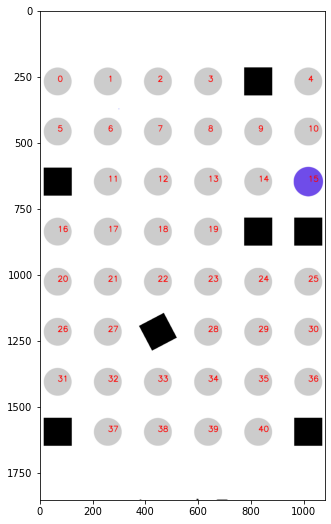

In [227]:

for i in dkv.keys():
    fontColor=(255,0,0)
    textPlace = (dkv[i][1], dkv[i][0])
    fontScale = 1
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_orig_2,str(i),textPlace,font, fontScale, fontColor, 2)
    count+=1

plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(img_orig_2)

## Find where is your starting point


---


    - now let's iterate through all the circles center coordinates
    - then check if each circle center color is more gray than others
    - return the center of circle where you will find the most gray color

In [228]:
def getStartPoint(my_dict):
    for i in my_dict.keys():
        if img[my_dict[i][0], my_dict[i][1]] < 200:
            return i

## Import the graph and find Hamiltonian Path from the pre-defined functions


---


    - make a graph with given vertices and edges
    - then get the starting point from for this graph
    - start the path at starting point
    - traverse and print all possible paths

In [229]:
from Find_a_way_bts_Hamiltonian_Path import *
 
# Set number of vertices in the graph
N = len(dkv.keys())
print(N)

# create a graph from edges
g = Graph(edges, N)
 
# starting node
start = getStartPoint(dkv)
 
# add starting node to the path
path = [start]
 
    # mark start node as visited
visited = [False] * N
visited[start] = True
printAllHamiltonianPaths(g, start, visited, path, N)

41
[15, 14, 13, 19, 18, 22, 23, 28, 29, 24, 25, 30, 36, 35, 40, 39, 34, 33, 38, 37, 32, 31, 26, 27, 21, 20, 16, 17, 11, 12, 7, 6, 5, 0, 1, 2, 3, 8, 9, 10, 4]


In [230]:
# copy paste from one of the above solution(s)
path = [15, 14, 13, 19, 18, 22, 23, 28, 29, 24, 25, 30, 36, 35, 40, 39, 34, 33, 38, 37, 32, 31, 26, 27, 21, 20, 16, 17, 11, 12, 7, 6, 5, 0, 1, 2, 3, 8, 9, 10, 4]

## Amazing! you've found the path to solve the problem


---


    - Now you found the path how to solve the level
    - just send the center of circle coordinates to 'adb commands' so it can draw the patter for you!
    - Remember that your image was initially cropped(along height) to get your Region of Interest, now you just need to add that cropped top height so you can get "actual" coordinate values

In [231]:
baseY = startY

for i in range(0, (len(path)-1)):
    print("OK")
    n1 = path[i]
    y1 = dkv[n1][0] + baseY
    x1 = dkv[n1][1]
    n2 = path[i+1]
    y2 = dkv[n2][0] + baseY
    x2 = dkv[n2][1]
    print(x1, y1, x2, y2)
    subprocess.call('adb shell input touchscreen tap ' + str(x2) + ' ' + str(y2))
    print(n1,n2)

OK
1012 1048 824 1048
15 14
OK
824 1048 634 1048
14 13
OK
634 1048 634 1238
13 19
OK
634 1238 444 1238
19 18
OK
444 1238 444 1426
18 22
OK
444 1426 634 1426
22 23
OK
634 1426 634 1616
23 28
OK
634 1616 824 1616
28 29
OK
824 1616 824 1426
29 24
OK
824 1426 1012 1426
24 25
OK
1012 1426 1012 1616
25 30
OK
1012 1616 1012 1804
30 36
OK
1012 1804 824 1804
36 35
OK
824 1804 824 1994
35 40
OK
824 1994 634 1994
40 39
OK
634 1994 634 1804
39 34
OK
634 1804 444 1804
34 33
OK
444 1804 444 1994
33 38
OK
444 1994 256 1994
38 37
OK
256 1994 256 1804
37 32
OK
256 1804 66 1804
32 31
OK
66 1804 66 1616
31 26
OK
66 1616 256 1616
26 27
OK
256 1616 256 1426
27 21
OK
256 1426 66 1426
21 20
OK
66 1426 66 1238
20 16
OK
66 1238 256 1238
16 17
OK
256 1238 256 1048
17 11
OK
256 1048 444 1048
11 12
OK
444 1048 444 858
12 7
OK
444 858 256 858
7 6
OK
256 858 66 858
6 5
OK
66 858 66 670
5 0
OK
66 670 256 670
0 1
OK
256 670 444 670
1 2
OK
444 670 634 670
2 3
OK
634 670 634 858
3 8
OK
634 858 824 858
8 9
OK
824 858 10